# Tutorial 9: Plots

__The goal of this assignment is to create 5 plots based on the Titanic dataset.__

Plots are a very useful tool to explore datasets and to present information to others.

You will use [Plotnine](https://plotnine.readthedocs.io/en/latest/index.html), a Python port of R `ggplot2` that provides 2D visualizations.

`ggplot2` is based on the [Grammar of Graphics](http://vita.had.co.nz/papers/layered-grammar.html), an algebra for plot components.

__Grade scale__: 10 points
- correct plot: 2 points
- incorrect plot: 0 points

__Further documentations__:
* https://ggplot2.tidyverse.org/reference/
* http://pbpython.com/python-vis-flowchart.html
* https://plotnine.readthedocs.io/en/latest/api.html
* https://www.kaggle.com/residentmario/grammar-of-graphics-with-plotnine-optional/#

![](https://i.imgur.com/UoIbtqI.png)

# Core

__VARIABLE DESCRIPTIONS__:

- __survival__        Survival(0 = No; 1 = Yes)
- __pclass__          Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- __name__            Name
- __sex__             Sex
- __age__             Age
- __sibsp__           Number of Siblings/Spouses Aboard
- __parch__           Number of Parents/Children Aboard
- __ticket__          Ticket Number
- __fare__            Passenger Fare
- __cabin__           Cabin
- __embarked__        Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [1]:
# import plotnine objects
from plotnine import *

# import pandas library
import pandas as pd

In [2]:
# load the dataset with pandas
df = pd.read_csv("titanic.csv.gz")

df.head()

,pclass,survival,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S


# Examples

/home/fmind/code/bigdata-tutorials/venv/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/fmind/code/bigdata-tutorials/venv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/fmind/code/bigdata-tutorials/venv/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 264 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


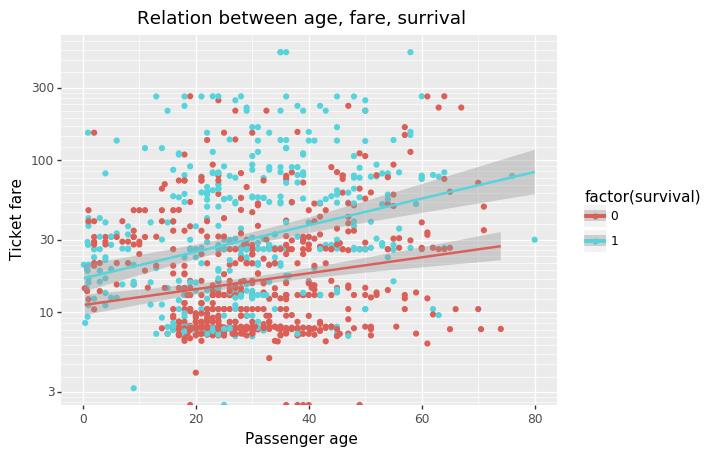

<ggplot: (-9223363264814635292)>

In [3]:
# you must specify the source (df) and the variables (aes) to ggplot
plot = ggplot(df, aes(x="age", y="fare", color="factor(survival)"))
plot += ggtitle("Relation between age, fare, surrival")  # title
plot += xlab("Passenger age")  # x label
plot += ylab("Ticket fare")  # y label
plot += geom_point()  # as a scatter plot
plot += stat_smooth(method='lm')  # regression line
plot += scale_y_log10()  # scale y-axis with log scale
plot

# Questions

__IMPORTANT__: Your result should match the image included in the question !

__1. Create a bar plot that represents the distribution of the `embarked` variable.__

![](P1.png)

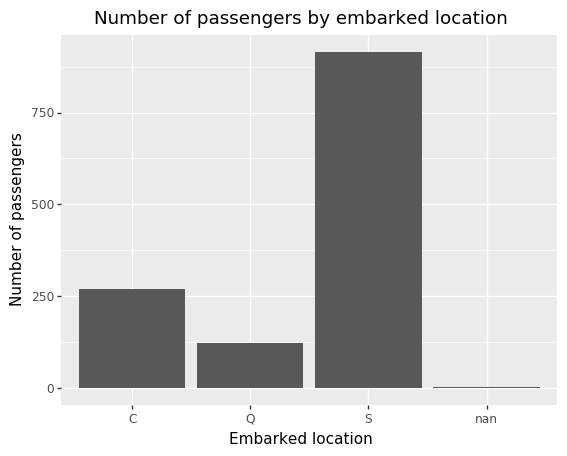

<ggplot: (-9223363264814745803)>

In [4]:
def Q1(df):
    plot = None
    ### BEGIN SOLUTION
    plot = ggplot(df, aes(x="embarked"))
    plot += geom_bar()
    ### END SOLUTION
    plot += ggtitle("Number of passengers by embarked location")
    plot += ylab("Number of passengers")
    plot += xlab("Embarked location")
    return plot

Q1(df)

In [5]:
plot = Q1(df)

assert len(plot.layers) == 1
assert len(plot.mapping) == 1
### BEGIN HIDDEN TESTS
assert type(plot.layers[0].geom) == geom_bar
assert plot.mapping == {'x': 'embarked'}
### END HIDDEN TESTS

__2. Create a jitter plot with a point size of 0.5 that represents the relation between `sibsp`, `parch` and `survival` variables__
- __note__: be careful about the y tick breaks !

![](P2.png)

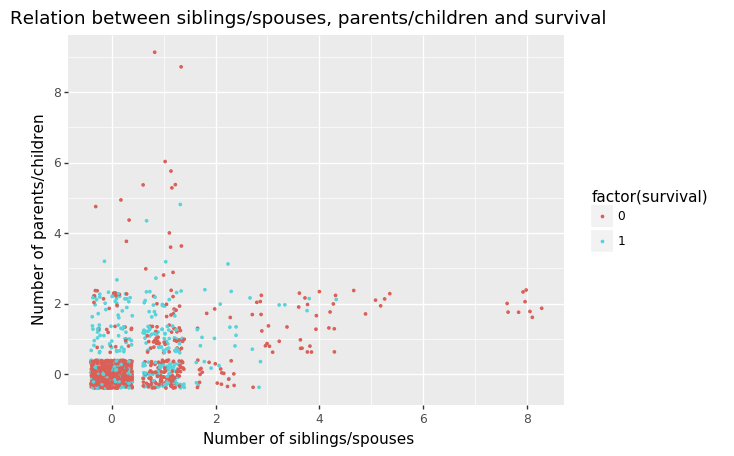

<ggplot: (-9223363264814714613)>

In [6]:
def Q2(df):
    plot = None
    ### BEGIN SOLUTION
    plot = ggplot(df, aes(x="sibsp", y="parch", color="factor(survival)"))
    plot += scale_y_continuous(breaks=range(0, 10, 2))
    plot += geom_jitter(size=0.5)
    ### END SOLUTION
    plot += ggtitle("Relation between siblings/spouses, parents/children and survival")
    plot += xlab("Number of siblings/spouses")
    plot += ylab("Number of parents/children")
    return plot
    
Q2(df)

In [7]:
plot = Q2(df)

assert len(plot.scales) == 1
assert len(plot.layers) == 1
assert len(plot.mapping) == 3
### BEGIN HIDDEN TESTS
assert type(plot.layers[0].geom) == geom_jitter
assert type(plot.scales[0]) == scale_y_continuous
assert plot.layers[0].geom.aes_params['size'] == 0.5
assert plot.mapping == {'x': 'sibsp', 'y': 'parch', 'color': 'factor(survival)'}
### END HIDDEN TESTS

__3. Create a box plot with 'red' outlier color and variable width to show the relation between `pclass` (x-axis) and `age` (y-axis) variables__
- __note__: the outlier color must be 'red', not '#FF0000' or other alternatives
- __hint__: you can use the factor() function for the aes to group values by plass

![](P3.png)

/home/fmind/code/bigdata-tutorials/venv/lib/python3.7/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_boxplot : Removed 263 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


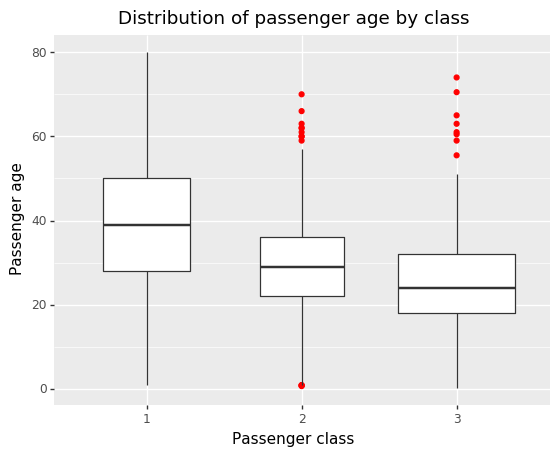

<ggplot: (8772040060785)>

In [8]:
def Q3(df):
    plot = None
    ### BEGIN SOLUTION
    plot = ggplot(df, aes(x="factor(pclass)", y="age"))
    plot += geom_boxplot(outlier_color='red', varwidth=True)
    ### END SOLUTION
    plot += ggtitle("Distribution of passenger age by class")
    plot += xlab("Passenger class")
    plot += ylab("Passenger age")
    return plot
    
Q3(df)

In [9]:
plot = Q3(df)

assert len(plot.layers) == 1
assert len(plot.mapping) == 2
### BEGIN HIDDEN TESTS
assert type(plot.layers[0].geom) == geom_boxplot
assert plot.mapping == {'x': 'factor(pclass)', 'y': 'age'}
assert plot.layers[0].geom.params['varwidth'] == True
assert plot.layers[0].geom.params['outlier_color'] == 'red'
### END HIDDEN TESTS

__4. Create a stacked histogram with 20 bins that shows the distribution of passenger `age` (x) according to `survival` (fill)__

![](P4.png)

/home/fmind/code/bigdata-tutorials/venv/lib/python3.7/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_bin : Removed 263 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


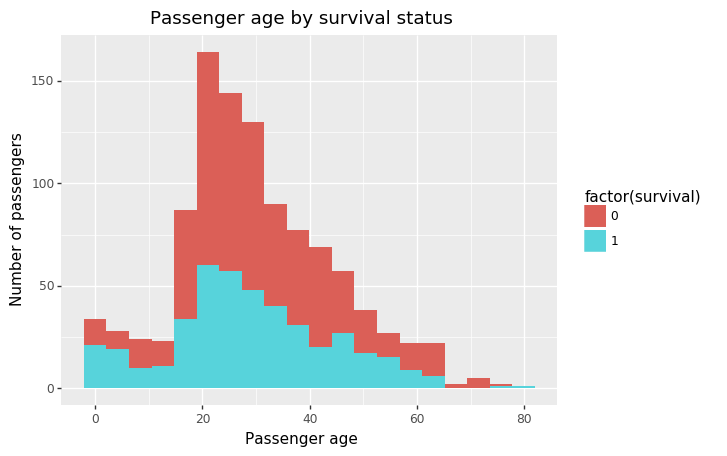

<ggplot: (-9223363264814714578)>

In [10]:
def Q4(df):
    plot = None
    ### BEGIN SOLUTION
    plot = ggplot(df, aes(x="age", fill="factor(survival)"))
    plot += geom_histogram(bins=20)
    ### END SOLUTION
    plot += ggtitle("Passenger age by survival status")
    plot += xlab("Passenger age")
    plot += ylab("Number of passengers")
    return plot
    
Q4(df)

In [11]:
plot = Q4(df)

assert len(plot.layers) == 1
assert len(plot.mapping) == 2
### BEGIN HIDDEN TESTS
assert type(plot.layers[0].geom) == geom_histogram
assert plot.mapping == {'x': 'age', 'fill': 'factor(survival)'}
assert plot.layers[0].stat.params['bins'] == 20
### END HIDDEN TESTS

__5. Create a heatmap plot that shows the number of passenger per `sex` (x-axis) and `pclass` (y-axis)__
- __hint__: you might have to create a new dataframe to aggregate the number of passengers
- __note__: name the aggregated variable 'count' and use geom_tile

![](P5.png)

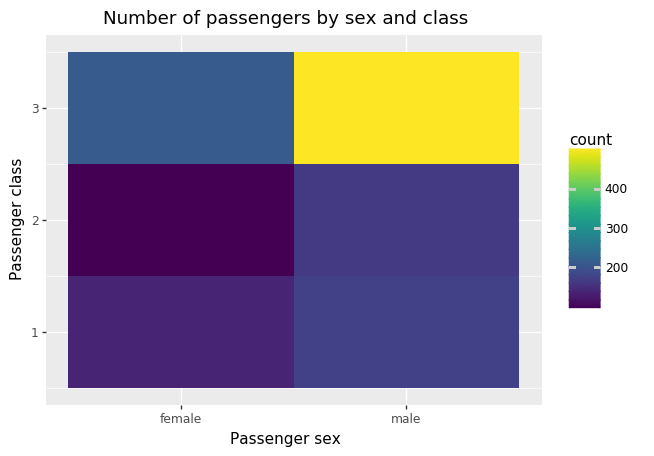

<ggplot: (-9223363264814715220)>

In [12]:
def Q5(df):
    plot = None
    ### BEGIN SOLUTION
    df = df.groupby(['sex', 'pclass'], as_index=False) \
           .agg({'name': 'count'}).rename({'name': 'count'}, axis=1)
    plot = ggplot(df, aes(x="sex", y="pclass"))
    plot += geom_tile(aes(fill="count"))
    ### END SOLUTION
    plot += ggtitle("Number of passengers by sex and class")
    plot += xlab("Passenger sex")
    plot += ylab("Passenger class")
    return plot
    
Q5(df)

In [13]:
plot = Q5(df)

assert len(plot.layers) == 1
assert len(plot.mapping) == 2
### BEGIN HIDDEN TESTS
assert type(plot.layers[0].geom) == geom_tile
assert plot.mapping == {'x': 'sex', 'y': 'pclass'}
assert set(plot.data['count']) == {106, 144, 171, 179, 216, 493}
### END HIDDEN TESTS